In [1]:
import itk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np_img = np.zeros((44, 44, 44, 44), dtype=np.uint8)
indices = np.indices(np_img.shape)
np_img[np.linalg.norm(indices - 22, axis=0) < 20.0] = 1

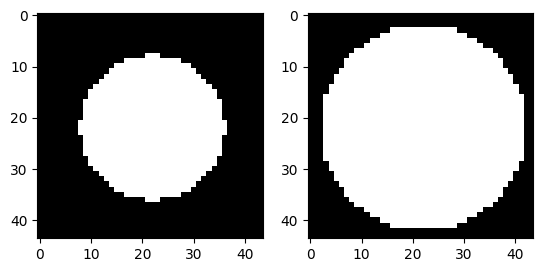

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(np_img[12, :, 12, :], cmap='gray')
ax2.imshow(np_img[22, :, :, 22], cmap='gray')

In [4]:
image = itk.image_from_array(np_img)

In [30]:
itk.imwrite(image, 'sphere.mha')

In [27]:
filter = itk.SignedMaurerDistanceMapImageFilter.New(image)
distance_map = filter.GetOutput()
filter2 = itk.DanielssonDistanceMapImageFilter.New(image)
distance_map2 = filter2.GetDistanceMap()

In [28]:
np_dist_map = itk.array_from_image(distance_map)
np_dist_map2 = itk.array_from_image(distance_map2)

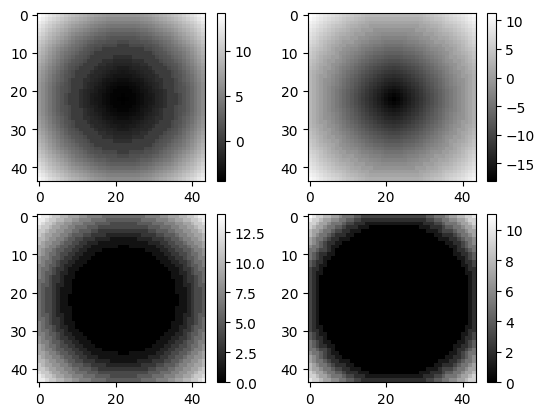

In [34]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.colorbar(ax1.imshow(np_dist_map[12, :, 12, :], cmap='gray'), ax=ax1)
fig.colorbar(ax2.imshow(np_dist_map[22, :, :, 22], cmap='gray'), ax=ax2)
fig.colorbar(ax3.imshow(np_dist_map2[12, :, 12, :], cmap='gray'), ax=ax3)
fig.colorbar(ax4.imshow(np_dist_map2[22, :, :, 22], cmap='gray'), ax=ax4)

In [40]:
dist_vec_map = filter2.GetVectorDistanceMap()
np_dist_vec_map = np.empty((44, 44, 44, 44, 4), dtype=np.int32)
for i in range(44):
    for j in range(44):
        for k in range(44):
            for l in range(44):
                for m in range(4):
                    np_dist_vec_map[i, j, k, l, m] = dist_vec_map.GetPixel([i, j, k, l])[m]

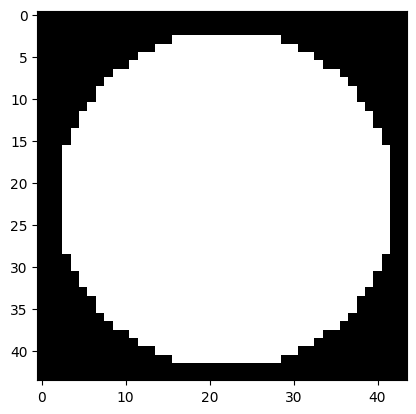

In [44]:
zero_len = np.linalg.norm(np_dist_vec_map[22, :, :, 22, :], axis=2) == 0
plt.imshow(zero_len, cmap='gray')

In [45]:
np.all(np_img[22, :, :, 22] == zero_len)

True